In [1]:
!pip3 install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/lts/1.8/cpu
     -------------------------------------- 191.7/191.7 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 847.4/847.4 kB 2.2 MB/s eta 0:00:00
     ------------------------------------ 109.3/109.3 kB 211.2 kB/s eta 0:00:00


In [2]:
!git clone https://github.com/ultralytics/yolov5 

Cloning into 'yolov5'...


In [3]:
!cd yolov5 & pip install -r requirements.txt

     --------------------------------------- 78.4/78.4 kB 61.5 kB/s eta 0:00:00
     ------------------------------------ 292.8/292.8 kB 348.0 kB/s eta 0:00:00


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

In [10]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 50 --data dataset.yml --weights yolov5s.pt 

Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   9ce5254..e4323a3  classifier -> origin/classifier
YOLOv5  v6.1-295-gf8722b4 Python-3.9.5 torch-1.8.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.

In [2]:
model = torch.hub.load('ultralytics/yolov5','custom',path='yolov5/runs/train/exp5/weights/best.pt',force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\HP/.cache\torch\hub\master.zip
YOLOv5  2023-1-24 Python-3.9.5 torch-1.8.2+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [3]:
img_path = input("Enter Image Name/Path: ")

Enter Image Name/Path: lion


In [4]:
img_path = img_path + ".jpg"
results = model(img_path)


In [5]:
results.print()

image 1/1: 1797x2596 2 lions
Speed: 118.3ms pre-process, 549.1ms inference, 15.7ms NMS per image at shape (1, 3, 448, 640)


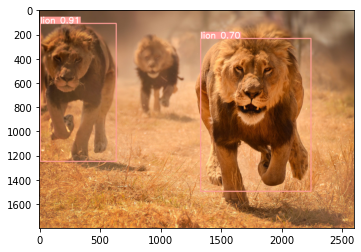

In [6]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
input_video = input("Enter video name/path: ")

Enter video name/path: elephant


input_video = input_video + ".mp4"
cap = cv2.VideoCapture(input_video)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
   cv2.imshow('YOLO', np.squeeze(results.render()))
    
   if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [10]:
input_video = input_video + ".mp4"
cap = cv2.VideoCapture(input_video)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()